In [3]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [5]:
from gym import envs
env_ids = [env_spec.id for env_spec in envs.registry.all()]
print(env_ids)


AttributeError: 'dict' object has no attribute 'all'

In [6]:
import gym
env = gym.make('Pendulum-v1').env

In [7]:
print("State space:", env.observation_space)


State space: Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)


In [8]:
print("Action space:", env.action_space)

Action space: Box(-2.0, 2.0, (1,), float32)


In [9]:
import imageio

In [10]:
nb_actions = env.action_space

In [11]:
nb_obs = env.observation_space

In [12]:
from collections import deque

In [13]:
class DQNAgent:
  def __init__(self):
    self.state_dim = 3
    self.action_dim = 9
    self.lr = 0.01
    self.gamma = 0.98
    self.tau = 0.01
    self.epsilon = 1.0
    self.epsilon_decay = 0.98
    self.epsilon_min = 0.001
    self.buffer_size = 100000
    self.batch_size = 200
    self.memory = ReplayBuffer(self.buffer_size)

    self.Q = QNetwork(self.state_dim, self.action_dim, self.lr)
    self.Q_target = QNetwork(self.state_dim, self.action_dim, self.lr)
    self.Q_target.load_state_dict(self.Q.state_dict())

In [14]:
class ReplayBuffer:
  def __init__(self, buffer_limit):
    self.buffer = deque(maxlen=buffer_limit)

  def put(self, transition):
    self.buffer.append(transition)

In [15]:
import torch.nn as nn

In [18]:
import torch.optim as optim
class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim, q_lr):
        super(QNetwork, self).__init__()

        self.fc_1 = nn.Linear(state_dim, 64)
        self.fc_2 = nn.Linear(64, 32)
        self.fc_out = nn.Linear(32, action_dim)

        self.lr = q_lr
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)



In [19]:
agent = DQNAgent()

TypeError: Image data of dtype object cannot be converted to float

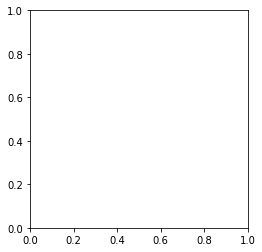

In [25]:
import pygame
env.reset()
pygame.init()

prev_screen = env.render()
prev_screen = np.array(prev_screen)
plt.imshow(prev_screen)

for i_episodes_2 in range(10001):
  action = env.reset()
  agent, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  screen = np.array(screen)

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

  ipythondisplay.clear_output(wait=True)
  env.close()